<a href="https://colab.research.google.com/github/ICBI/AIMAHEAD_GU/blob/main/Courses/ML_Concepts/Module_06_Natural_Language_Processing/Module_6_Natural_Language_Processing_01_text_representation_bow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/AAlogo1.jpg" alt="Powered by" width="150"/>

#AI/ML for Healthcare Applications : Lab 6a Text Representation - Bag of Words

Based on material from the Georgetown [Health Informatics and Data Science](https://healthinformatics.georgetown.edu) program and licensed under  [CC4.0](https://creativecommons.org/licenses/by/4.0/)


The aim of this notebook is to provide an hands-on demo of selecting model and tuning hyperparameters using sklearn.


In this demo, we will explore how to represent textual data for Machine Learning. In this first part we will explore the **Bag of Words** representation of enconding text to vectors

In [1]:
import pandas as pd
import numpy as np

### The Bag of Words representation

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

*    **tokenizing** strings and giving an integer id for each possible token, for instance by using whitespaces and punctuation as token separators.
*    **counting** the occurrences of tokens in each document.
*    **normalizing** and weighting with diminishing importance tokens that occur in the majority of samples / documents.

In this scheme, features and samples are defined as follows:

*    each **individual token occurrence frequenc**y (normalized or not) is treated as a feature.
*    the vector of all the token frequencies for a given **document** is considered a multivariate sample.

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific stragegy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

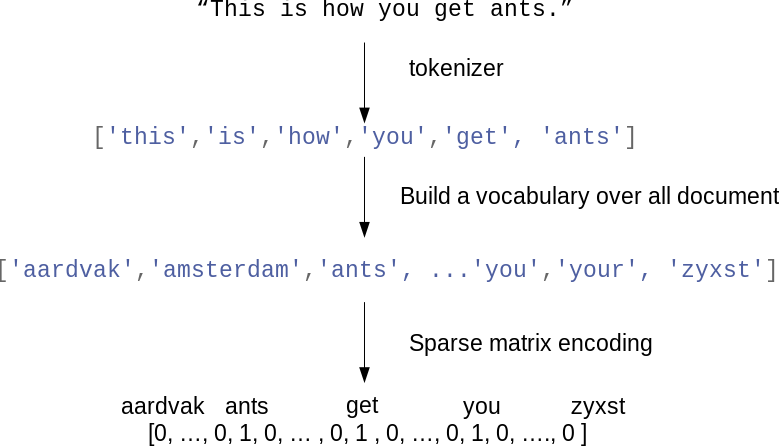

### Sparsity

As most documents will typically use a very subset of a the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

In order to be able to store such a matrix in memory but also to speed up algebraic operations matrix / vector, implementations will typically use a sparse representation such as the implementations available in the `scipy.sparse `package.

### Count Vectorizer

sklearn's  `CountVectorizer` implements both tokenization and occurrence counting in a single class:

**Bag-of-words on a toy dataset**

Some terms:

**document** - refers to a single piece of text information. This could be a text message, tweet, email, book, lyrics to a song. This is equivalent to one row or observation.

**corpus** - a collection of documents. This would be equivalent to a whole data set of rows/observations.

**token** - this is a word, phrase, or symbols derived from a document through the process of tokenization.



In [2]:
messages = ["Patient A received an immunotherapy and got skin rash",
           "Patient B received chemotherapy instead of an immunotherapy"]

We’ll use CountVectorizer() from sklearn to create a matrix of numbers to represent our messages. CountVectorizer() takes what’s called the Bag of Words approach. Each message is seperated into tokens and the number of times each token occurs in a message is counted.

We’ll import CountVectorizer from sklearn and instantiate it as an object, similar to how you would with a classifier from sklearn. In fact the usage is very similar. Instead of using fit() and then predict() we will use fit() then transform() or in one step fit_transform()

In [3]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [4]:
vect

CountVectorizer()

This model has many parameters, however the default values are quite reasonable.
Full parameter details: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html




In one step: **fit_transform()**

In [5]:
vect = CountVectorizer()

In [6]:
messages

['Patient A received an immunotherapy and got skin rash',
 'Patient B received chemotherapy instead of an immunotherapy']

In [7]:
# build vocabulary and transform
X = vect.fit_transform(messages)

In [8]:
X

<2x11 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [9]:
X.toarray().shape

(2, 11)

In [10]:
X.toarray()

array([[1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0]])

In [11]:
vect.get_feature_names_out()

array(['an', 'and', 'chemotherapy', 'got', 'immunotherapy', 'instead',
       'of', 'patient', 'rash', 'received', 'skin'], dtype=object)

In [12]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

,an,and,chemotherapy,got,immunotherapy,instead,of,patient,rash,received,skin
0,1,1,0,1,1,0,0,1,1,1,1
1,1,0,1,0,1,1,1,1,0,1,0


#### Going beyond 1-grams

In [13]:
messages

['Patient A received an immunotherapy and got skin rash',
 'Patient B received chemotherapy instead of an immunotherapy']

To preserve some of the local ordering information we can extract 2-grams of words in addition to the 1-grams (the word themselvs):

In [14]:
bigram_vectorizer = CountVectorizer(ngram_range=(1,2))
analyze = bigram_vectorizer.build_analyzer()

In [15]:
analyze('Bi-grams are cool!')

['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool']

In [16]:
X_2 = bigram_vectorizer.fit_transform(messages)

In [17]:
X_2

<2x22 sparse matrix of type '<class 'numpy.int64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [18]:
X_2.toarray()

array([[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0]])

In [19]:
X_2.toarray().shape

(2, 22)

In [20]:
bigram_vectorizer.get_feature_names_out()

array(['an', 'an immunotherapy', 'and', 'and got', 'chemotherapy',
       'chemotherapy instead', 'got', 'got skin', 'immunotherapy',
       'immunotherapy and', 'instead', 'instead of', 'of', 'of an',
       'patient', 'patient received', 'rash', 'received', 'received an',
       'received chemotherapy', 'skin', 'skin rash'], dtype=object)

In [21]:
pd.DataFrame(X_2.toarray(), columns=bigram_vectorizer.get_feature_names_out())

,an,an immunotherapy,and,and got,chemotherapy,chemotherapy instead,got,got skin,immunotherapy,immunotherapy and,...,of,of an,patient,patient received,rash,received,received an,received chemotherapy,skin,skin rash
0,1,1,1,1,0,0,1,1,1,1,...,0,0,1,1,1,1,1,0,1,1
1,1,1,0,0,1,1,0,0,1,0,...,1,1,1,1,0,1,0,1,0,0


### TF-IDF normalization

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningul information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

Tf means **term-frequency** while tf–idf means term-frequency times **inverse document-frequency**. This is a orginally a term weighting scheme developed for information retrieval (as a ranking function for search engines results), that has also found good use in document classification and clustering.

To generalize: `TF-IDF = term frequency * (1 / document frequency)`

Or: `TF-IDF = term frequency * inverse document frequency`


Term frequency is a weight representing how often a word occurs in a document. If we have several occurences of the same word in one document we can expect the TF-IDF to increase.

Inverse document frequency is another weight representing how common a word is across documents. If a word is used in many documents then the TF-IDF will decrease.


There are many ways to calculate the TF-IDF, but all essentially calculate the same concept.

tfidf(w,d) = tf * log((N+1)/(Nw +1 )) +1


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vect = TfidfVectorizer()

In [24]:
messages = ["Patient A received an immunotherapy and got skin rash",
           "Patient B received chemotherapy instead of an immunotherapy"]

In [25]:
X = vect.fit_transform(messages)

In [26]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 11
Vocabulary content:
 {'patient': 7, 'received': 9, 'an': 0, 'immunotherapy': 4, 'and': 1, 'got': 3, 'skin': 10, 'rash': 8, 'chemotherapy': 2, 'instead': 5, 'of': 6}


In [27]:
pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

,an,and,chemotherapy,got,immunotherapy,instead,of,patient,rash,received,skin
0,0.289869,0.407401,0.000000,0.407401,0.289869,0.000000,0.000000,0.289869,0.407401,0.289869,0.407401
1,0.317404,0.000000,0.446101,0.000000,0.317404,0.446101,0.446101,0.317404,0.000000,0.317404,0.000000


**Ending notes**

When instantiating your vectorizer there are a few arguments to tweak that can help downstream ML models

*    max_features = n : only considers the top n words orderd by term frequency
*    min_df = n : ignores words with a document frequency below n
*    max_df = n : ignores words with a document frequency above n
*    stop_words = [’ ‘] : ignores common words like 'the', 'that', 'which', etc. You’ll need to define in a list what words you want to include. There are lists of common stop words available online, the NLTK library also has a list of stop words built into it.


# Text Classification using Bag of Words

In this sectiopn, we will explore how to use the **Bag of Words** representation of enconding text to vectors and train shallow ML models (Logistic Regression, Naive Bayes, SVM etc.) for text classification

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

### Dataset

For this workshop of text classification, we will using a corpus of adverse drug reaction sentences collected from PubMed articles.

Full details of the raw corpus can be found here:  https://pubmed.ncbi.nlm.nih.gov/22554702/

Raw corpus link: https://sites.google.com/site/adecorpus/

We have preprocessed the raw corpus and generated a csv file with


*   pubmed abstracts sentences with an adverse drug reaction: Posistive sentences
*  pubmed abstracts sentences with no adverse drug reaction: Negative sentences

Files can be found on Canvas under "Files/lecture5/data

In [29]:
!wget https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/ML_Concepts/ade_corpus_subset.csv
ade_file = "/content/ade_corpus_subset.csv"


--2024-10-22 13:43:23--  https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/ML_Concepts/ade_corpus_subset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1571574 (1.5M) [text/plain]
Saving to: ‘ade_corpus_subset.csv’

ade_corpus_subset.c 100%[===================>]   1.50M  --.-KB/s    in 0.09s   

2024-10-22 13:43:23 (17.3 MB/s) - ‘ade_corpus_subset.csv’ saved [1571574/1571574]



In [30]:
ade_df = pd.read_csv(ade_file)

In [31]:
ade_df.head()

,pmid,sentence,label
0,11174414,"Severe rash, including the Stevens-Johnson syn...",1
1,12645965,Significant systemic manifestations are rare.,0
2,17172571,Chronic paroxysmal hemicrania (CPH) is a rare ...,0
3,16109609,Of twenty other patients in our practice who r...,0
4,15779196,A 74-year old white man was undergoing treatme...,0


In [32]:
ade_df.shape

(11272, 3)

Positive instances

In [33]:
ade_df[ade_df['label'] == 1]

,pmid,sentence,label
0,11174414,"Severe rash, including the Stevens-Johnson syn...",1
7,7696938,Arrhythmias and cardiac arrest have been repor...,1
9,16298824,"Dyspnea, hypoxemia, and pleuritic chest pain o...",1
12,8071504,Toxic optic neuropathy associated with ethambu...,1
17,18037876,Multiple syncopal episodes started to occur du...,1
...,...,...,...
11257,15053046,Agranulocytosis induced by vancomycin in an ES...,1
11259,8926752,Zolpidem tissue concentrations in a multiple d...,1
11268,19018868,We describe a case of severe aplastic anemia (...,1
11269,10803790,CONCLUSION: In some abstainers who take cyanam...,1


Negative instances

In [34]:
ade_df[ade_df['label'] == 0]

,pmid,sentence,label
1,12645965,Significant systemic manifestations are rare.,0
2,17172571,Chronic paroxysmal hemicrania (CPH) is a rare ...,0
3,16109609,Of twenty other patients in our practice who r...,0
4,15779196,A 74-year old white man was undergoing treatme...,0
5,15866658,"RESULTS: Of the 18 patients treated with MMF, ...",0
...,...,...,...
11264,7151655,Some degree of biochemical improvement was als...,0
11265,6702890,The erythroid defect fully reversed after the ...,0
11266,11109149,A leukocytoclastic vasculitis was found in bot...,0
11267,15259089,Hepatitis B virus reactivation in a patient un...,0


In [35]:
Counter(ade_df['label'])

Counter({1: 4272, 0: 7000})

Extract train (X) and test (y)

In [36]:
X_docs = ade_df['sentence'].values
y = ade_df['label'].values

In [37]:
X_docs.shape, y.shape

((11272,), (11272,))

In [38]:
#split into train and test
from sklearn.model_selection import train_test_split

In [39]:
X_train_docs, X_test_docs, y_train, y_test = train_test_split(X_docs, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [40]:
X_train_docs.shape, X_test_docs.shape, y_train.shape, y_test.shape

((7552,), (3720,), (7552,), (3720,))

In [41]:
Counter(y_train), Counter(y_test)

(Counter({0: 4714, 1: 2838}), Counter({0: 2286, 1: 1434}))

Sample sentence

In [42]:
X_train_docs[:5]

array(['The adverse pulmonary effects of erlotinib are less well known.',
       'Protamine is used widely to reverse the anticoagulant effects of heparin and to delay the absorption of insulin.',
       'Intravitreal corticossteroids have been used for therapeutic purposes in optimum doses and adverse reports have not been described.',
       'On reduction of the intrathecal baclofen dose, complete return to baseline sexual function was achieved for both subjects.',
       'Herpes simplex esophagitis in a renal transplant patient treated with cyclosporine A: a case report.'],
      dtype=object)

label for the above sample sentence

In [43]:
y[:5]

array([1, 0, 0, 0, 0])

### Vectorize and train models

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
#vect = TfidfVectorizer(min_df=5)

In [46]:
vect = TfidfVectorizer(min_df=5, ngram_range=(1,2))

In [47]:
X_train_docs[:5]

array(['The adverse pulmonary effects of erlotinib are less well known.',
       'Protamine is used widely to reverse the anticoagulant effects of heparin and to delay the absorption of insulin.',
       'Intravitreal corticossteroids have been used for therapeutic purposes in optimum doses and adverse reports have not been described.',
       'On reduction of the intrathecal baclofen dose, complete return to baseline sexual function was achieved for both subjects.',
       'Herpes simplex esophagitis in a renal transplant patient treated with cyclosporine A: a case report.'],
      dtype=object)

In [48]:
X_train = vect.fit_transform(X_train_docs)

In [49]:
X_train_docs.shape

(7552,)

In [50]:
X[:5]

<2x11 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [51]:
X_train.shape

(7552, 6395)

In [52]:
print("X_train:\n{}".format(repr(X_train)))

X_train:
<7552x6395 sparse matrix of type '<class 'numpy.float64'>'
	with 155963 stored elements in Compressed Sparse Row format>


In [53]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}".format(len(feature_names)))

Number of features: 6395


In [54]:
feature_names[200:300]

array(['acidosis', 'acidosis and', 'acne', 'acquired',
       'acquired immunodeficiency', 'acromegaly', 'act', 'acth', 'acting',
       'actinomycin', 'action', 'action of', 'activated', 'activation',
       'activator', 'active', 'activity', 'acuity', 'acute',
       'acute coronary', 'acute generalized', 'acute hepatitis',
       'acute interstitial', 'acute leukemia', 'acute liver',
       'acute lung', 'acute lymphoblastic', 'acute lymphocytic',
       'acute myelogenous', 'acute myeloid', 'acute myocardial',
       'acute onset', 'acute pancreatitis', 'acute promyelocytic',
       'acute renal', 'acute respiratory', 'acute severe', 'acyclovir',
       'adalimumab', 'added', 'added to', 'adding', 'addition',
       'addition of', 'addition to', 'additional', 'adenocarcinoma',
       'adenosine', 'adequate', 'adjunctive', 'adjuvant', 'administered',
       'administering', 'administration', 'administration and',
       'administration for', 'administration in', 'administration is',

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [56]:
lr_model = LogisticRegression(max_iter=200)
nb_model = MultinomialNB()

In [57]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [58]:
X_test_docs[:5]

array(['APOLT restored the plasma FH level, without HUS recurrence, for 7 months.',
       'It is suggested that the hypermagnesemia directly suppressed PTH secretion, resulting in symptomatic hypocalcemia.',
       'Renal function returned to normal eventually, but she continued to have relapses of exfoliative dermatitis up to a year later.',
       'Acute renal failure (ARF) is a rare but severe complication of active idiopathic nephrotic syndrome (INS) in children.',
       'To eradicate the infection, we performed two vitrectomies and treated the patient with numerous intravitreal antibiotic injections.'],
      dtype=object)

Predict on X_test_docs?

In [59]:
lr_model.predict(X_test_docs)

ValueError: could not convert string to float: 'APOLT restored the plasma FH level, without HUS recurrence, for 7 months.'

**Note: The code above should fail. We can't predict directly on X_test_docs.**

We need to transform the X_test_docs to a document matrix. We apply the fitted vectorizer that was learned on the training set.

Note, its only tranform() and not fit_trasform(). We are not learning a new vectorizer, just transforming new (test) documents to a feature matrix using the one fitted on the training set.

In [60]:
X_test = vect.transform(X_test_docs)

In [61]:
X_test.shape

(3720, 6395)

In [62]:
lr_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [63]:
y_test_pred = lr_model.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2286
           1       0.82      0.65      0.73      1434

    accuracy                           0.81      3720
   macro avg       0.81      0.78      0.79      3720
weighted avg       0.81      0.81      0.81      3720



In [66]:
def train_and_test(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_test_pred = clf.predict(X_test)
  print(classification_report(y_test, y_test_pred))

In [67]:
train_and_test(LogisticRegression(max_iter=200),
                                    X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2286
           1       0.82      0.65      0.73      1434

    accuracy                           0.81      3720
   macro avg       0.81      0.78      0.79      3720
weighted avg       0.81      0.81      0.81      3720



In [68]:
train_and_test(MultinomialNB(),
               X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      2286
           1       0.79      0.63      0.70      1434

    accuracy                           0.79      3720
   macro avg       0.79      0.76      0.77      3720
weighted avg       0.79      0.79      0.79      3720



**The END** <br>
**Authors: Dr. Samir Gupta, Dr. Matthew McCoy & ICBI AIM-AHEAD Team**

<img src="https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/HIDSLOGO.AA1.jpg" alt="Powered by" width="500"/>
